In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load dataset
file_path = "../data/final/merged_karachi.csv"
df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Data loaded successfully!
Shape: (17952, 11)


,datetime,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,temperature_2m,relative_humidity_2m,wind_speed_10m,wind_direction_10m
0,2024-01-01T00:00,68.9,46.2,598.0,6.7,97.0,19.9,15.3,65,11.9,61
1,2024-01-01T01:00,70.1,47.1,689.0,14.8,89.0,20.4,14.9,67,12.4,60
2,2024-01-01T02:00,72.6,49.1,812.0,25.8,78.0,21.2,14.6,68,12.6,59
3,2024-01-01T03:00,76.1,51.8,887.0,31.8,77.0,22.2,15.2,66,13.0,51
4,2024-01-01T04:00,77.5,53.0,872.0,28.3,95.0,23.6,17.6,57,12.0,44


In [4]:
# Info summary
df.info()

# Missing values
print("\nMissing Values:\n", df.isna().sum())

# Duplicates
print("\nDuplicates:", df.duplicated().sum())

# Basic statistics
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17952 entries, 0 to 17951
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              17952 non-null  object 
 1   pm10                  17952 non-null  float64
 2   pm2_5                 17952 non-null  float64
 3   carbon_monoxide       17952 non-null  float64
 4   nitrogen_dioxide      17952 non-null  float64
 5   ozone                 17952 non-null  float64
 6   sulphur_dioxide       17952 non-null  float64
 7   temperature_2m        17952 non-null  float64
 8   relative_humidity_2m  17952 non-null  int64  
 9   wind_speed_10m        17952 non-null  float64
 10  wind_direction_10m    17952 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB

Missing Values:
 datetime                0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
ozone             

,count,mean,std,min,25%,50%,75%,max
pm10,17952.0,61.078615,36.572608,3.9,38.3,52.4,74.0,448.9
pm2_5,17952.0,28.290775,13.398480,3.8,19.0,24.9,34.0,108.7
carbon_monoxide,17952.0,494.708055,443.012910,46.0,218.0,318.0,615.0,4515.0
nitrogen_dioxide,17952.0,20.473067,19.197775,0.7,7.6,13.5,26.3,154.1
ozone,17952.0,72.697025,39.931887,0.0,44.0,64.0,97.0,240.0
sulphur_dioxide,17952.0,13.540837,8.823047,2.3,6.5,11.7,17.7,65.4
temperature_2m,17952.0,26.525379,4.967133,10.0,23.5,27.4,30.0,41.5
relative_humidity_2m,17952.0,64.085227,21.940769,5.0,49.0,69.0,82.0,100.0
wind_speed_10m,17952.0,13.174265,6.678848,0.0,8.3,11.9,17.0,46.6
wind_direction_10m,17952.0,216.398173,94.221810,1.0,200.0,249.0,272.0,360.0


📊 Statistics for PM10
Skewness: 2.594
Kurtosis: 12.583
--------------------------------------------------
📊 Statistics for PM2_5
Skewness: 1.432
Kurtosis: 2.483
--------------------------------------------------
📊 Statistics for CARBON_MONOXIDE
Skewness: 2.531
Kurtosis: 8.993
--------------------------------------------------
📊 Statistics for NITROGEN_DIOXIDE
Skewness: 2.098
Kurtosis: 5.321
--------------------------------------------------
📊 Statistics for OZONE
Skewness: 0.707
Kurtosis: -0.053
--------------------------------------------------
📊 Statistics for SULPHUR_DIOXIDE
Skewness: 1.497
Kurtosis: 2.986
--------------------------------------------------


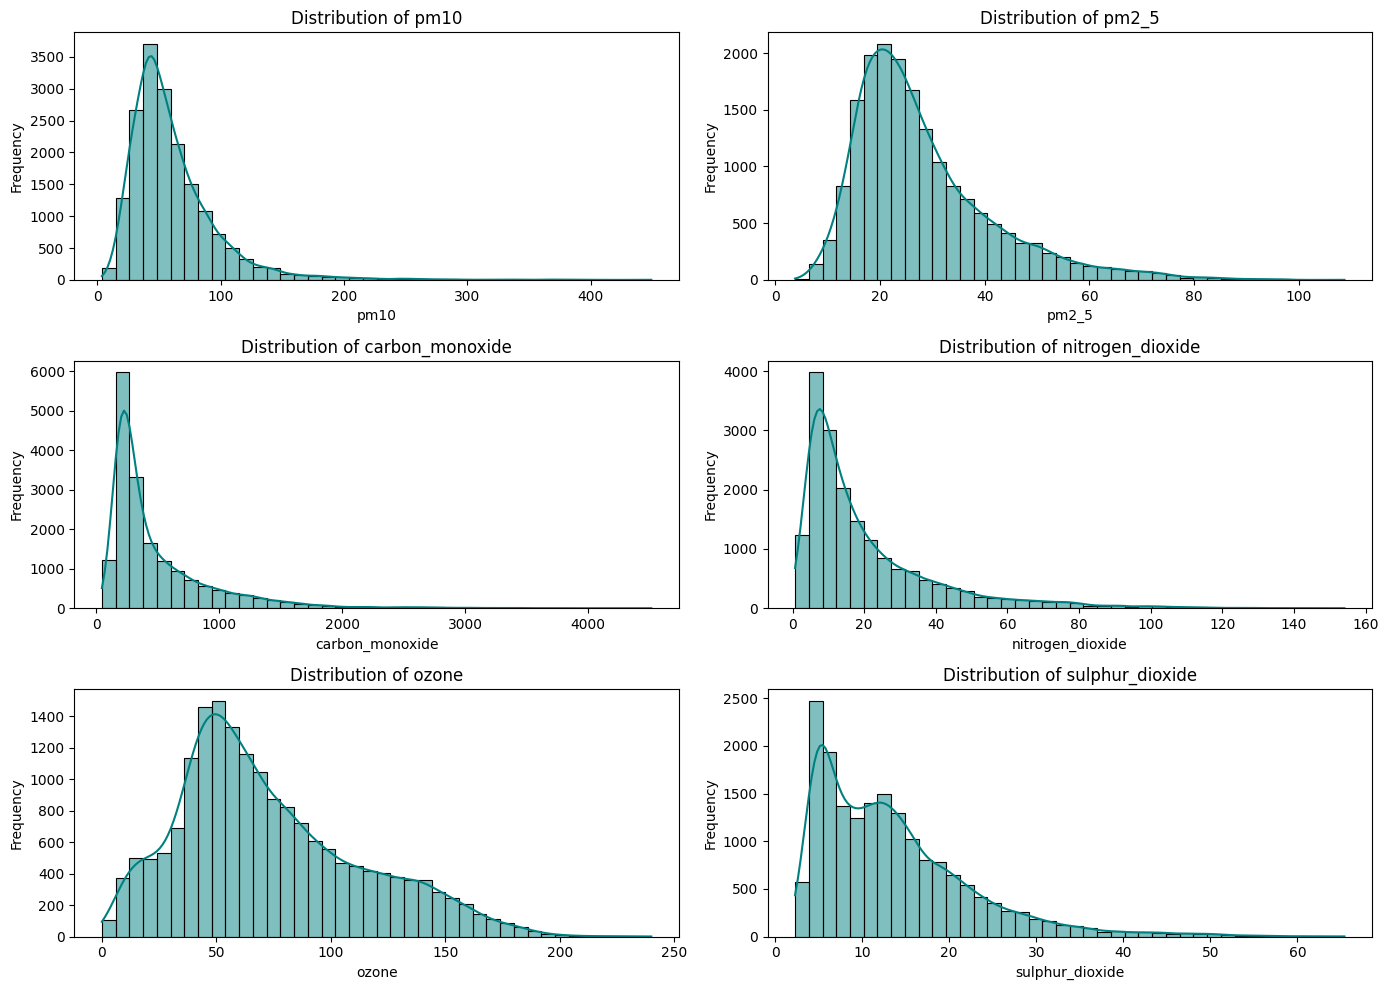

In [5]:
pollutants = ["pm10", "pm2_5", "carbon_monoxide", "nitrogen_dioxide",
              "ozone", "sulphur_dioxide"]

# --- Print statistical info for each pollutant ---
for col in pollutants:
    print(f"📊 Statistics for {col.upper()}")
    print(f"Skewness: {df[col].skew():.3f}")
    print(f"Kurtosis: {df[col].kurtosis():.3f}")
    print("-" * 50)

# --- Plot distributions ---
plt.figure(figsize=(14, 10))
for i, col in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=40, kde=True, color="teal")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


OUTLIERS DETECTION

In [6]:
bounds = {}
def detect_outliers_percentile(df, column, lower_pct=0.01, upper_pct=0.99):
    lower = df[column].quantile(lower_pct)
    upper = df[column].quantile(upper_pct)
    bounds[col] = (lower, upper)
    return df[(df[column] < lower) | (df[column] > upper)]
for col in pollutants:
    outliers = detect_outliers_percentile(df, col)
    print(f"{col.upper()}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

PM10: 357 outliers (1.99%)
PM2_5: 355 outliers (1.98%)
CARBON_MONOXIDE: 359 outliers (2.00%)
NITROGEN_DIOXIDE: 330 outliers (1.84%)
OZONE: 320 outliers (1.78%)
SULPHUR_DIOXIDE: 334 outliers (1.86%)


Handle Outliers

In [8]:
pollutants_cap = ["pm10","pm2_5","carbon_monoxide"]

for col in pollutants_cap:
    lower, upper = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

print("Outliers capped using 1st-99th percentile method.")

for col in pollutants_cap:
    q1, q99 = df[col].quantile(0.01), df[col].quantile(0.99)
    print(f"\n{col.upper()}:")
    print(f"Min value: {df[col].min()} | Should be >= {q1}")
    print(f"Max value: {df[col].max()} | Should be <= {q99}")

Outliers capped using 1st-99th percentile method.

PM10:
Min value: 15.0 | Should be >= 15.0
Max value: 199.89604000000062 | Should be <= 199.84705960000048

PM2_5:
Min value: 9.4 | Should be >= 9.4
Max value: 73.1 | Should be <= 73.1

CARBON_MONOXIDE:
Min value: 124.0 | Should be >= 124.0
Max value: 2248.480200000003 | Should be <= 2248.2352980000023


PM10: 0
PM2_5: 0
CARBON_MONOXIDE: 0


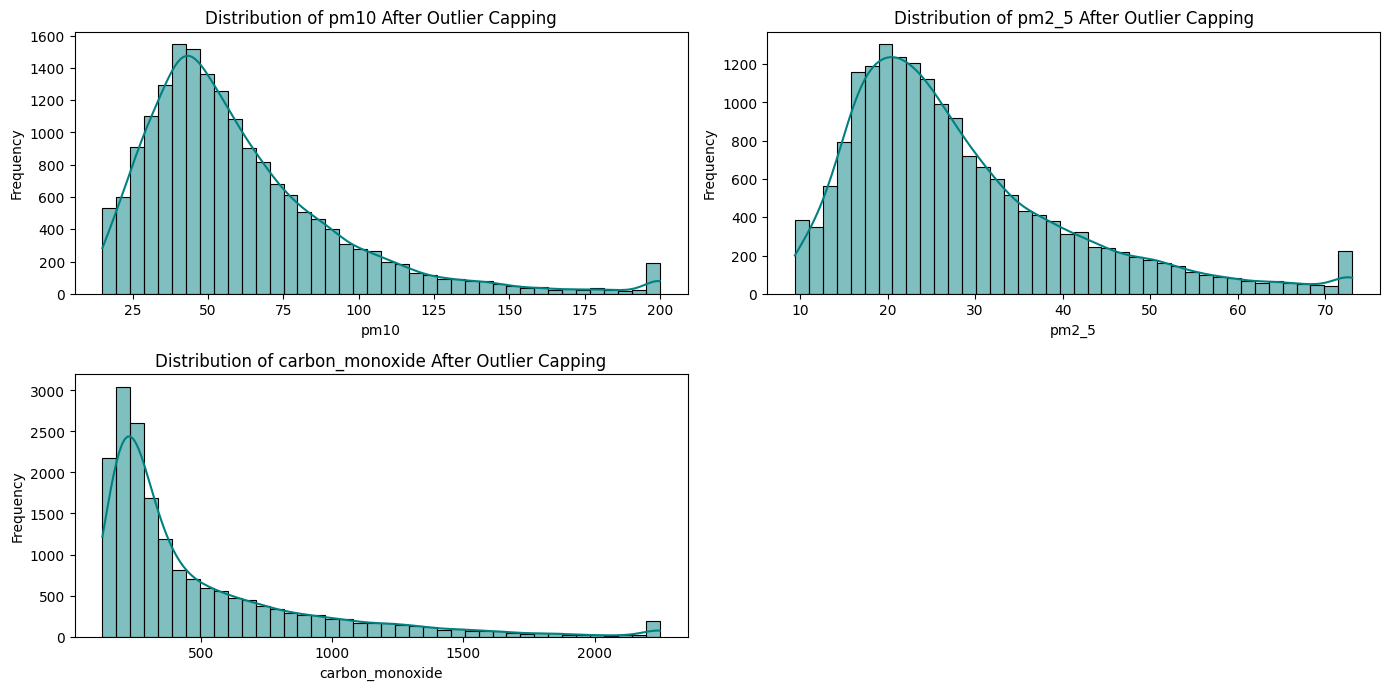

In [9]:
# --- Re-check for outliers after capping ---
for col in pollutants_cap:
    outliers = df[(df[col] < bounds[col][0]) | (df[col] > bounds[col][1])]
    print(f"{col.upper()}: {len(outliers)}")
    
# --- Plot distributions after Outlier handling---
plt.figure(figsize=(14, 10))
for i, col in enumerate(pollutants_cap, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=40, kde=True, color="teal")
    plt.title(f"Distribution of {col} After Outlier Capping")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Datetime Conversion + Feature Check

In [10]:
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.sort_values("datetime").reset_index(drop=True)
print("✅ Datetime column converted and sorted chronologically.")
print(df["datetime"].head())
df.info()

✅ Datetime column converted and sorted chronologically.
0   2024-01-01 00:00:00
1   2024-01-01 01:00:00
2   2024-01-01 02:00:00
3   2024-01-01 03:00:00
4   2024-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17952 entries, 0 to 17951
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              17952 non-null  datetime64[ns]
 1   pm10                  17952 non-null  float64       
 2   pm2_5                 17952 non-null  float64       
 3   carbon_monoxide       17952 non-null  float64       
 4   nitrogen_dioxide      17952 non-null  float64       
 5   ozone                 17952 non-null  float64       
 6   sulphur_dioxide       17952 non-null  float64       
 7   temperature_2m        17952 non-null  float64       
 8   relative_humidity_2m  17952 non-null  int64         
 9   wind_speed_10m        17952 non-nu

Pollutant & Weather Correlation Heatmap

                          pm10     pm2_5  carbon_monoxide  nitrogen_dioxide  \
pm10                  1.000000  0.465620        -0.079758         -0.033848   
pm2_5                 0.465620  1.000000         0.613595          0.547518   
carbon_monoxide      -0.079758  0.613595         1.000000          0.751738   
nitrogen_dioxide     -0.033848  0.547518         0.751738          1.000000   
ozone                 0.062739 -0.034020        -0.175473         -0.513272   
sulphur_dioxide      -0.006548  0.553449         0.589364          0.403094   
temperature_2m        0.233315 -0.384896        -0.503838         -0.493632   
relative_humidity_2m  0.020925 -0.231345        -0.265894         -0.002415   
wind_speed_10m        0.203217 -0.331607        -0.539741         -0.489140   
wind_direction_10m    0.083486 -0.326375        -0.339926         -0.116082   

                         ozone  sulphur_dioxide  temperature_2m  \
pm10                  0.062739        -0.006548        0.233315

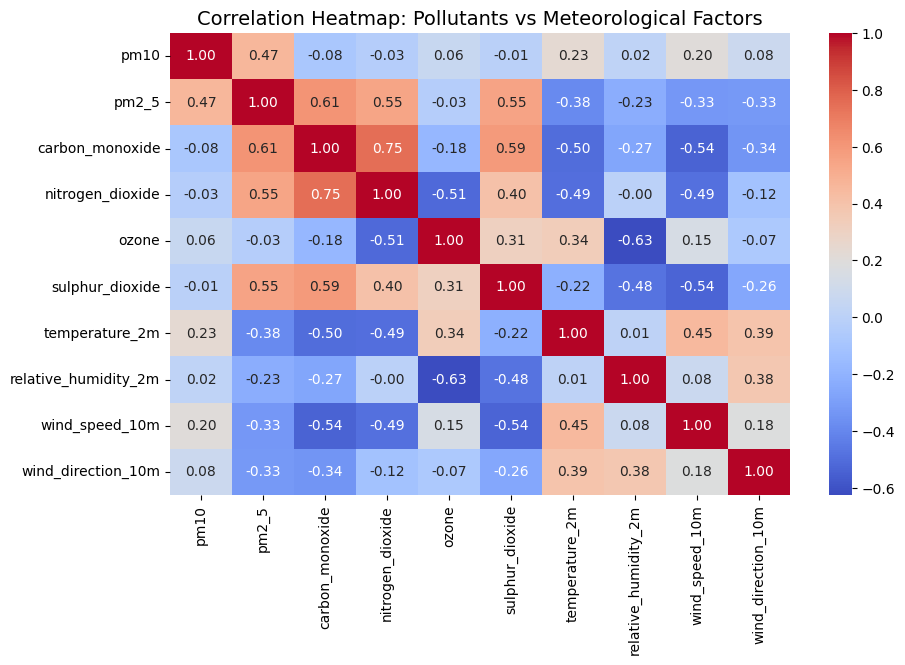

In [11]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Pollutants vs Meteorological Factors", fontsize=14)
plt.show()

Temporal Trends Overview

            pm10      pm2_5  carbon_monoxide  nitrogen_dioxide      ozone  \
month                                                                       
1      60.357802  41.739610       881.930555         32.503165  81.877110   
2      60.374547  28.731798       563.878655         26.874635  79.527047   
3      58.315154  23.842003       434.647849         20.076680  88.180108   
4      59.478954  21.928750       329.306944         14.866875  86.803472   
5      60.290807  20.886626       246.235215         11.382997  73.385081   
6      77.263140  24.224375       221.002778         10.072778  68.073611   
7      92.121350  28.551815       227.271505         11.372043  62.665995   
8      62.658199  22.013306       273.246507         12.597110  52.905914   
9      56.086481  21.374236       265.400000         14.560833  50.543056   
10     51.264871  27.892070       506.936722         21.686962  79.469758   
11     45.737222  35.252292       863.265646         34.464931  70.762500   

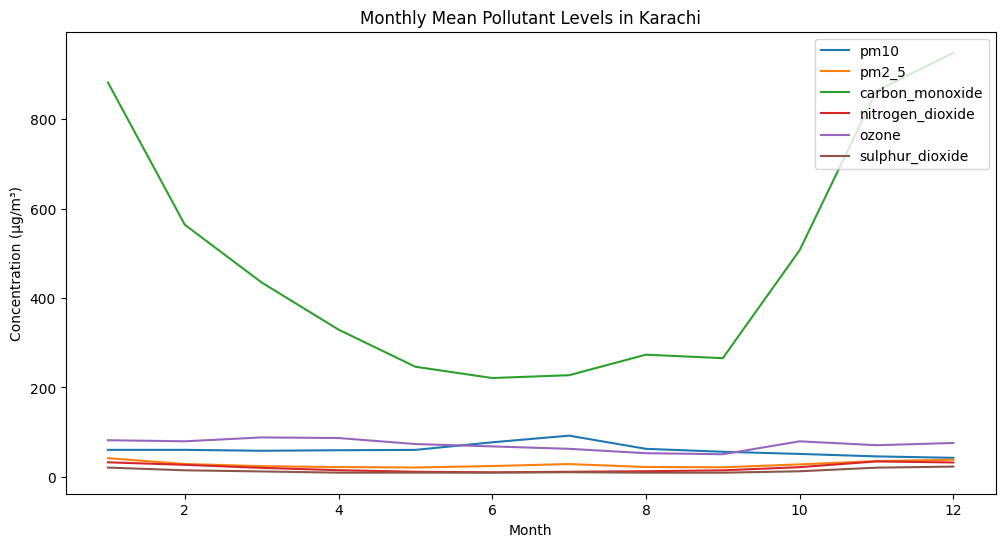

In [12]:
df["month"] = df["datetime"].dt.month
monthly_means = df.groupby("month")[pollutants].mean()
print(monthly_means)
monthly_means.plot(figsize=(12, 6))
plt.title("Monthly Mean Pollutant Levels in Karachi")
plt.xlabel("Month")
plt.ylabel("Concentration (µg/m³)")
plt.legend(loc="upper right")
plt.show()

In [13]:
clean_path = "../data/final/clean_merged_karachi.csv"
df.to_csv(clean_path, index=False)
print(f"✅ Cleaned dataset saved successfully → {clean_path}")

✅ Cleaned dataset saved successfully → ../data/final/clean_merged_karachi.csv


In [14]:
clean_df = pd.read_csv(clean_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17952 entries, 0 to 17951
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              17952 non-null  datetime64[ns]
 1   pm10                  17952 non-null  float64       
 2   pm2_5                 17952 non-null  float64       
 3   carbon_monoxide       17952 non-null  float64       
 4   nitrogen_dioxide      17952 non-null  float64       
 5   ozone                 17952 non-null  float64       
 6   sulphur_dioxide       17952 non-null  float64       
 7   temperature_2m        17952 non-null  float64       
 8   relative_humidity_2m  17952 non-null  int64         
 9   wind_speed_10m        17952 non-null  float64       
 10  wind_direction_10m    17952 non-null  int64         
 11  month                 17952 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(2)
memory usage: 1.6 MB


In [15]:
df.columns

Index(['datetime', 'pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide',
       'ozone', 'sulphur_dioxide', 'temperature_2m', 'relative_humidity_2m',
       'wind_speed_10m', 'wind_direction_10m', 'month'],
      dtype='object')